In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import matplotlib.pyplot as plt


PRD='/Users/hh65/Desktop/220408_XM_EdURBtest01'
cell_list=['MCF10A', 'MCF10AHER', 'MCF10Aold', 'HeLa']
dose=[0,0.0313,0.0625,0.125,0.25,0.5,1,2,4,8]
length=len(dose)

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(PRD, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
def group_df(df1,Cell_List=cell_list,Dose=dose):
    reldfs=[]
    df1=df1.groupby(['condition','row','column'])['cell_number'].sum()
    df1=df1.reset_index()
    for i,j in enumerate(Cell_List):
        rel_1=100*df1.iloc[i*length:(i+1)*length,3]/df1.iloc[i*length,3]
        rel_1 = rel_1.to_frame()
        rel_1 = rel_1.rename(columns = {'cell_number':'rel_nuclei'})
        rel_1['Cell_Line']=j
        rel_1['Dose']=Dose
        reldfs.append(rel_1)
    rel=pd.concat(reldfs)
    df2=pd.concat([df1,rel], axis=1)
    return df2

In [3]:
df_1=pd.read_csv(os.path.join(PRD,'220120_MCF10a_MCF10dHer2_MCF10OLD_Hela_604tit.idx.xml_ccdata.csv'), index_col=0)
df_2=pd.read_csv(os.path.join(PRD,'220204_MCF10a_MCF10dHer2_MCF10OLD_Hela_604tit_2.idx.xml_ccdata.csv'), index_col=0)

df_list=[df_1,df_2]
df_list = list(map(group_df,df_list))

df1=pd.concat(df_list)
df1=df1.reset_index(drop=True)
df1.to_csv(os.path.join(PRD,'final_data.csv'))

In [4]:
df1.head()



,condition,row,column,cell_number,rel_nuclei,Cell_Line,Dose
0,220120_MCF10a_MCF10dHer2_MCF10OLD_Hela_604tit....,1,1,44409,100.000000,MCF10A,0.0000
1,220120_MCF10a_MCF10dHer2_MCF10OLD_Hela_604tit....,1,2,52482,118.178748,MCF10A,0.0313
2,220120_MCF10a_MCF10dHer2_MCF10OLD_Hela_604tit....,1,3,56050,126.213155,MCF10A,0.0625
3,220120_MCF10a_MCF10dHer2_MCF10OLD_Hela_604tit....,1,4,54882,123.583057,MCF10A,0.1250
4,220120_MCF10a_MCF10dHer2_MCF10OLD_Hela_604tit....,1,5,45964,103.501542,MCF10A,0.2500


Saving figure MCF10A_Figure


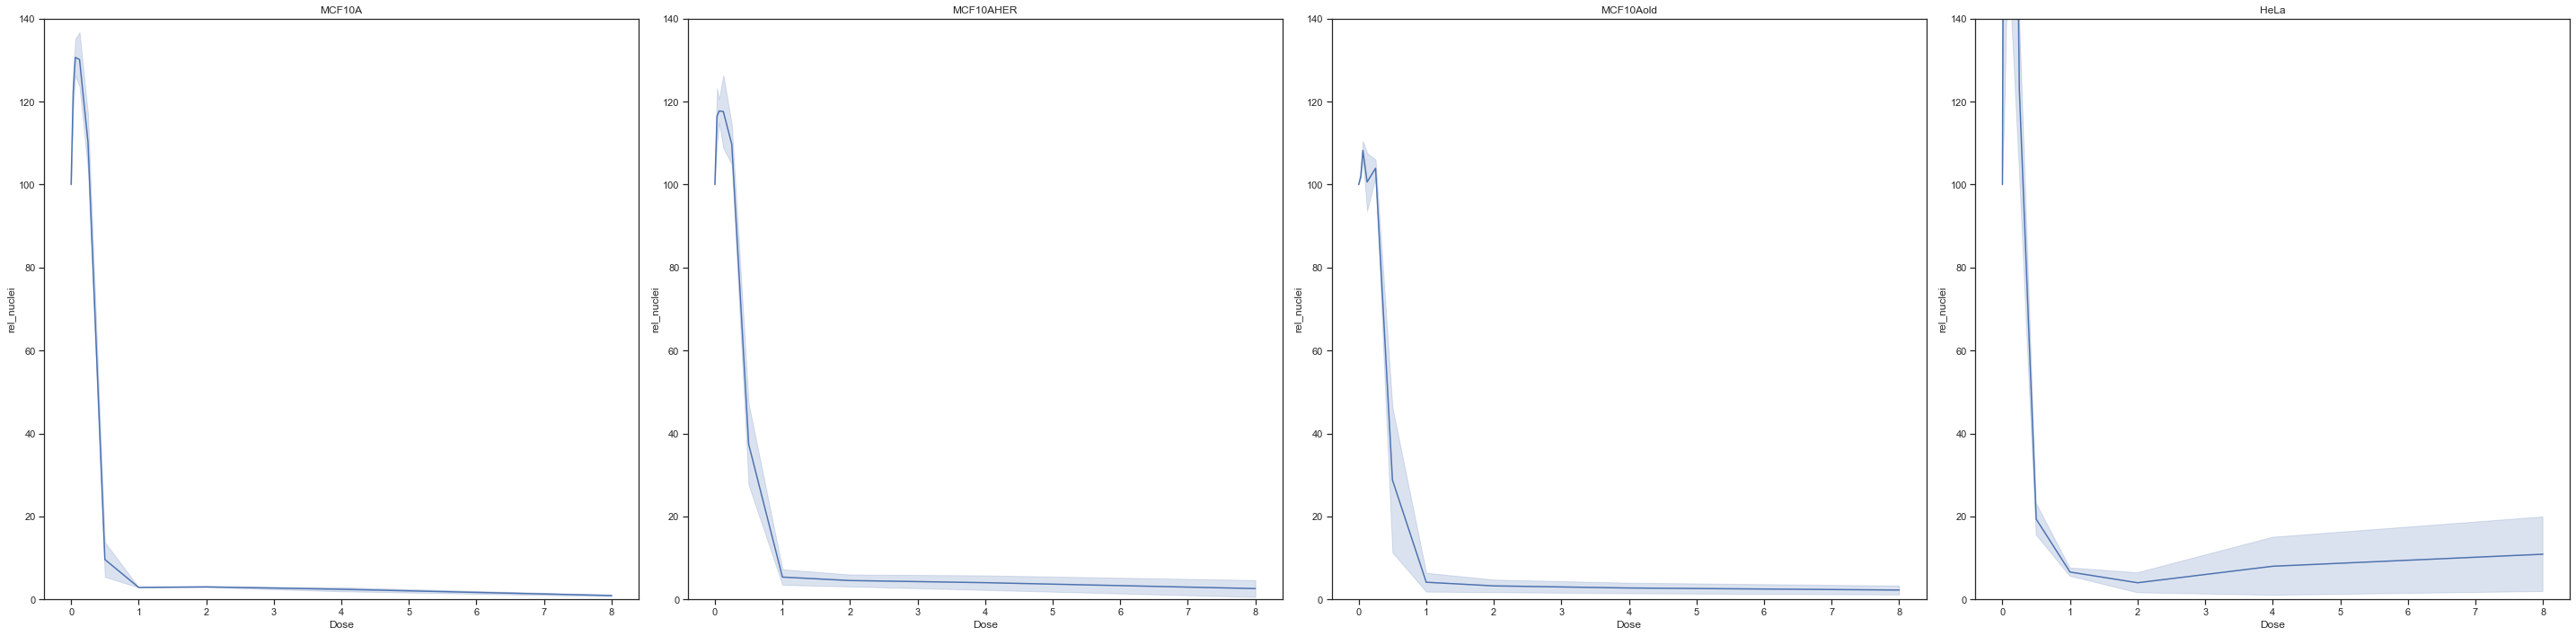

In [5]:
import seaborn as sns
sns.set(style="ticks", font='Arial')
fig, ax = plt.subplots(ncols=(len(cell_list)), figsize=(len(cell_list)*10, 10))
for i,j in enumerate(cell_list):
    sns.lineplot(y='rel_nuclei',x='Dose',
        data=df1[df1['Cell_Line']==j],ax=ax[i])
    ax[i].title.set_text(j)
    ax[i].set_ylim([0,140])
save_fig('MCF10A_Figure')